In [3]:
# Import modules
import math
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.signal import freqz
from scipy.signal import sosfreqz

# 
function of amplitude:

digital sound signal is essentially just a (very large) array of individual numbers that represent the sound's amplitude over time.
When we want to combine two sound signals together, all we have to do is add the samples from both signals together for each time step.
We have just synthesized a wave using additive synthesis.
When we combine signals like this, some samples end up having a higher amplitude than in either of the originals, which makes sense because what we're doing is adding signals together. But some samples are lower than either of the originals, which is because sine waves also oscillate to the negative side of the x-axis, and we end up effectively subtracting samples.
The extreme form of this kind of subtraction is with two waves that are exactly opposite of each other: Waves that have the same frequency and amplitude, but are in opposite phases. They completely cancel each other out, leaving nothing but silence.
This is what happens in noise-canceling headphones. They synthesize sound waves in real time that are the exact opposite of the environmental noise reaching your ears. The goal is that you end up hearing none of that noise because the sounds cancel each other out.



function of harmonics:

The fundamental harmonic is the main one, which is simply the note you want to play. The next one is twice as fast and called the second harmonic. The next is three times the speed and called the third harmonic, and so on. By combining sine waves whose frequencies (speeds) are multiples of the fundamental one, but whose amplitudes (loudness) differ, you can make pretty much any melodic sound you can think of.



In [2]:
# Function to generate complex tone

def generate_complex_tone(f0, fs, amplitudes, phases, duration, n_comp=5):
    '''
    Arguments:
    f0 - fundamental freq
    fs - sampling freq
    amplitudes, phases - absolute amplitude and phase value for the f0 and the harmonics
    
    Returns the complex tone signal
    '''
    assert len(amplitudes) == n_comp, "Incorrect number of amplitudes provided"
    assert len(phases) == n_comp, "Incorrect number of phases provided"
    
    n=np.arange(0,duration*fs)
    x=np.zeros(len(n))
    
    for i in range(len(amplitudes)):
        x = x + amplitudes[i]*np.sin(2*np.pi*(i+1)*(f0/fs)*n + phases[i])
    return x

In [3]:
# Parameters for synthesis

pi = np.pi
f0=1000                   #in Hz
fs=16000                 #in samples/s
#amplitudes=[1,1,1,1,1]
phases=[pi/2,pi/2,pi/2,pi/2,pi/2]
duration=1              #in seconds

In [7]:
import numpy as np
amplitude = np.array([[1,1,1,1,1],[1,2,1,2,1],[2,3,2,1,3],[1,2,3,2,1]])
len(amplitude[0])

5

[1 1 1 1 1]


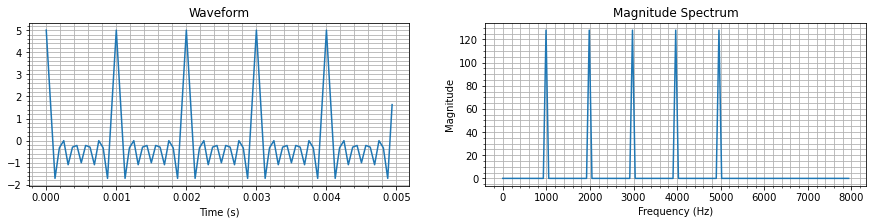

[1 2 1 2 1]


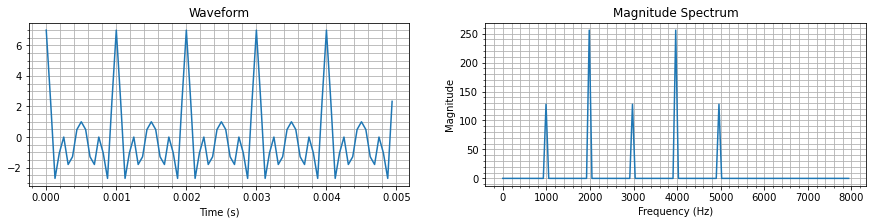

[2 3 2 1 3]


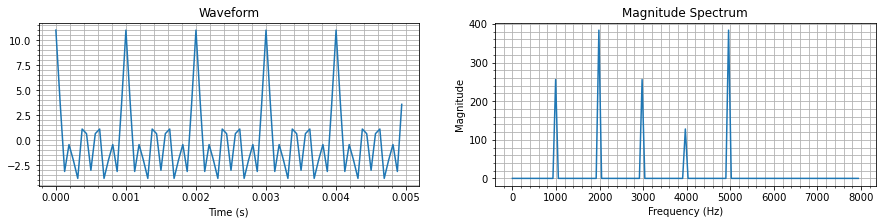

[1 2 3 2 1]


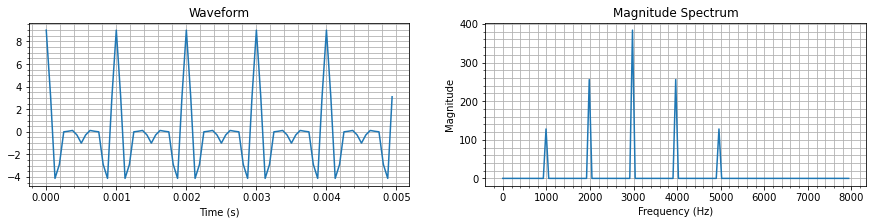

In [8]:
# Change below line to '%matplotlib notebook'  to allow zooming in, moving the plot around, etc.
%matplotlib inline 

import numpy as np

for amplitudes in amplitude:
  #  amplitudes = list(np.random.randint(low = 0,high=6,size=5))
    print(amplitudes)
    
    # Generate a tone based on above specifications
    x = generate_complex_tone(f0,fs,amplitudes,phases,duration,n_comp=5)
    # Calculate the DFT of x
    n_fft=256
    x_spec = np.fft.rfft(x,n_fft)
    t = np.arange(len(x))/fs
    f = np.arange(len(x_spec))*fs/(2*len(x_spec))
    
    # Plot the waveform
    fig,ax=plt.subplots(1,2,figsize=(15, 3))
    ax[0].plot(t[:5*fs//f0], x[:5*fs//f0])
    ax[0].set_title('Waveform'); ax[0].set_xlabel('Time (s)')
    ax[0].minorticks_on(); ax[0].grid(which='both')
    
    # Plot the magnitude spectrum
    ax[1].plot(f, np.abs(x_spec))
    ax[1].set_title('Magnitude Spectrum')
    ax[1].set_xlabel('Frequency (Hz)'); ax[1].set_ylabel('Magnitude')
    ax[1].minorticks_on(); ax[1].grid(which='both')
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=fs))


In [9]:
note_freq = {'C':131, 'C#':139, 'D':147, 'D#':156, 
         'E':165, 'F':175, 'F#':185, 'G':196, 
         'G#':208, 'A':220, 'A#':233, 'B':247, 'C2':262}

melody = [('C',1), ('C', 1), ('D',2), ('C',2), ('F',2), ('E',4), 
          ('C',1), ('C',1), ('D',2), ('C',2), ('G',2), ('F',4), 
          ('C',1), ('C',1), ('C2',2), ('A',2), ('F',2), ('E',2), ('D',2),
          ('A#',1), ('A#',1), ('A',2), ('F',2), ('G',2), ('F',4)]

In [ ]:
pi = np.pi

fs = 16000
beat_dur = 400e-3

synth_song = np.array([])
for note in melody:
    f0 = note_freq[note[0]]
    duration = note[1]*beat_dur
    
    
    # synthesize note using a complex tone
    x = generate_complex_tone(f0,fs,[1,2,1,2,1],[pi/2,pi/2,pi/2,pi/2,pi/2],duration)
    
    synth_song = np.append(synth_song, x)
    
ipd.display(ipd.Audio(data=synth_song, rate=fs))
    


In [ ]:
synth_song1 = np.array([])
for note in melody:
    f0 = note_freq[note[0]]
    duration = note[1]*beat_dur
    
    
    # synthesize note using a complex tone
    x = generate_complex_tone(f0,fs,[1,2,1,2,1],[pi/2,pi,3*pi/2,2*pi,5*pi/2],duration)
    
    synth_song1 = np.append(synth_song1, x)
    
ipd.display(ipd.Audio(data=synth_song1, rate=fs))
    

In [ ]:
synth_song3 = np.array([])
for note in melody:
    f0 = note_freq[note[0]]
    duration = note[1]*beat_dur
    
    
    # synthesize note using a complex tone
    x = generate_complex_tone(f0,fs,[1,1,1,1,1],[3*pi/2,3*pi,3*pi/2,3*pi/2,3*pi/2],duration)
    
    synth_song3 = np.append(synth_song3, x)
    
ipd.display(ipd.Audio(data=synth_song3, rate=fs))
    

In [ ]:
synth_song4 = np.array([])
for note in melody:
    f0 = note_freq[note[0]]
    duration = note[1]*beat_dur
    
    
    # synthesize note using a complex tone
    x = generate_complex_tone(f0,fs,[1,1,1,1,1],[pi,pi,pi,pi,pi],duration)
    
    synth_song4 = np.append(synth_song4, x)
    
ipd.display(ipd.Audio(data=synth_song4, rate=fs))
    

In [ ]:
synth_song5 = np.array([])
for note in melody:
    f0 = note_freq[note[0]]
    duration = note[1]*beat_dur
    
    
    # synthesize note using a complex tone
    x = generate_complex_tone(f0,fs,[2,3,2,1,3],[pi/2,pi,3*pi/2,2*pi,3*pi/2],duration)
    
    synth_song5 = np.append(synth_song5, x)
    
ipd.display(ipd.Audio(data=synth_song5, rate=fs))